In [47]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
plt.style.use('fivethirtyeight')
#script, infile = argv

In [45]:
i = "../individual_stats/58336.170112.315.SNP50A.imiss"

In [42]:
#So when we read  this into pandas datatable, we see that what we're interested in is the F_MISS statistic
#This is the proportion of missing genotypes per individual
#Our current filtering value is 0.05, so anything that is missing more than 5% of genotypes will be dropped
infile= pd.read_table(i,delim_whitespace=True)
infile.head()

,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
0,1,SIMUSAM000001211738,Y,28,48407,0.000578
1,1,SIMUSAM000001346584,Y,11,48407,0.000227
2,1,SIMUSAM000000767774,Y,179,48407,0.003698
3,1,SIMUSAM000000520611,Y,18,48407,0.000372
4,1,SIMUSAM000001749492,Y,53,48407,0.001095


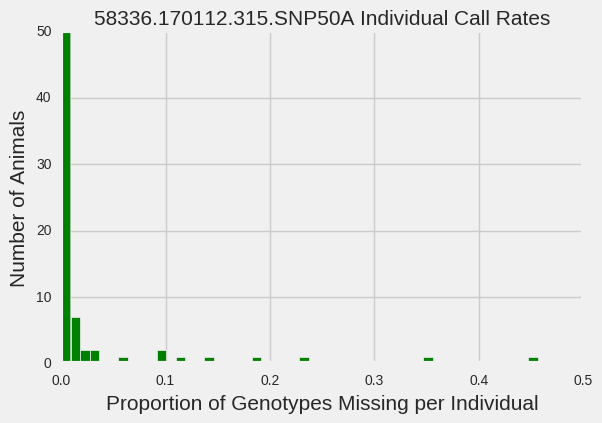

In [43]:
#When we limit the ylimit to ~50, that allows us to pick up the bins with lower frequency values. 
#Notice the y axis.  Not showing all of the animals, vast majority of them are going to have missing genotypes VERY close to zero
#Limiting the y axis allows us to see the animals that are likely being excluded in our analyses.
#Made some changes to color and font size in this.  I think that things look readable, not going to be publishing this stuff
#
ax =infile.F_MISS.plot.hist(bins=50, ylim=(0,50),color='g')
ax.set_axis_bgcolor('white')
ax.set_xlabel("Proportion of Genotypes Missing per Individual")
ax.set_ylabel("Number of Animals")
ax.set_title(title + ' Individual Call Rates')
for item in(ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(15)
    


In [49]:
z=i.strip("../individual_stats/")
title=z.strip('.imiss')
fig = ax.get_figure()
outname=title + '_individual_call_rate.png'
fig.savefig('../allele_stats/figures/'+ outname,format='png')
plt.close('all')
#In final code I changed this section to just write it to the name given by argv
#When doing it that way, that means that it can be namedw